Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from systole.detection import ecg_peaks
from systole.plots import plot_frequency, plot_pointcare
from systole import import_dataset1
from systole.utils import input_conversion
from systole.hrv import frequency_domain, time_domain, nonlinear

from IPython.display import Image
from IPython.core.display import HTML

from bokeh.io import output_notebook
from bokeh.plotting import show
from bokeh.layouts import row
output_notebook()

sns.set_context('talk')

Loading BokehJS ...

In [2]:
# Import ECg recording
ecg_df = import_dataset1(modalities=['ECG'])

# Select the first minute of recording
signal = ecg_df.ecg.to_numpy()

# R peaks detection
signal, peaks = ecg_peaks(signal, method='pan-tompkins', sfreq=1000)

# Convert peaks vector to RR time series
rr = input_conversion(peaks, input_type='peaks', output_type='rr_ms')

## Heart rate variability

### Time domain

In [3]:
# Extract time domain heart rate variability
hrv_df = time_domain(rr, input_type='rr_ms')

# Pivot the dataframe so it render nicely in notebook
pd.pivot_table(hrv_df, values='Values', columns='Metric')

Metric,MaxBPM,MaxRR,MeanBPM,MeanRR,MedianBPM,MedianRR,MinBPM,MinRR,RMSSD,SDNN,nn50,pnn50
Values,126.05,1041.0,75.97,793.0,75.09,799.0,57.64,476.0,27.02,52.1,85.0,4.39


### Frequency domain

In [4]:
# Extract time domain heart rate variability
hrv_df = frequency_domain(rr, input_type='rr_ms')

# Pivot the dataframe so it render nicely in notebook
pd.pivot_table(hrv_df, values='Values', columns='Metric')

Metric,hf_peak,hf_power,lf_peak,lf_power,power_hf_nu,power_hf_per,power_lf_nu,power_lf_per,power_vlf_per,vlf_peak,vlf_power
Values,0.3555,249.940941,0.0938,472.33325,0.653953,11.559663,0.346047,21.845213,66.595125,0.0078,1439.907797


In [5]:
show(
    plot_frequency(rr, input_type='rr_ms', backend='bokeh', figuresize=400)
)

### Non linear domain

In [6]:
# Extract time domain heart rate variability
hrv_df = nonlinear(rr, input_type='rr_ms')

# Pivot the dataframe so it render nicely in notebook
pd.pivot_table(hrv_df, values='Values', columns='Metric')

Metric,SD1,SD2
Values,19.111024,71.158424


In [7]:
show(
    plot_pointcare(rr, input_type='rr_ms', backend='bokeh', figure_size=400)
)

<AxesSubplot:title={'center':'Pointcaré plot'}, xlabel='RR (n)', ylabel='RR (n+1)'>

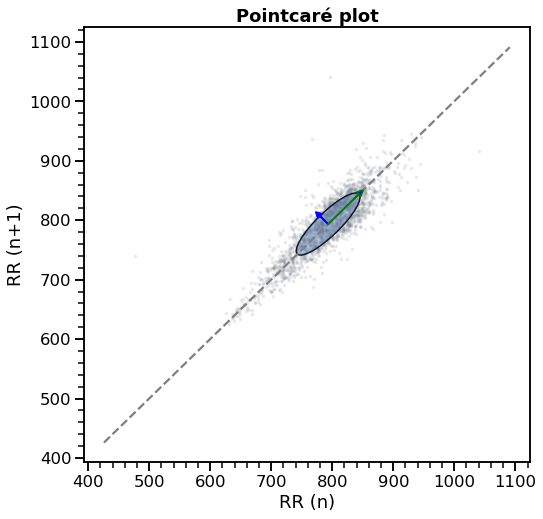

In [8]:
plot_pointcare(rr, input_type='rr_ms', backend='matplotlib', figure_size=400)

In [9]:
show(
    row(
        plot_frequency(rr, input_type="rr_ms", backend="bokeh", figsize=(600, 500)),
        plot_pointcare(rr, input_type="rr_ms", backend="bokeh", figsize=(500, 500)),
    )
)